### $\tau$ resolved results

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [40]:
%%time
K = {}
V = {}
E = {}

CPU times: user 23 µs, sys: 83 µs, total: 106 µs
Wall time: 109 µs


In [41]:
%%time
K['beta=1'] = np.loadtxt("resolved/2_2_1.0000_-0.7000_1.0000_1.0000_100000_canK.dat")
V['beta=1'] = np.loadtxt("resolved/2_2_1.0000_-0.7000_1.0000_1.0000_100000_canV.dat")
K['beta=2'] = np.loadtxt("resolved/2_2_1.0000_-1.9000_1.0000_2.0000_100000_canK.dat")
V['beta=2'] = np.loadtxt("resolved/2_2_1.0000_-1.9000_1.0000_2.0000_100000_canV.dat")
# K['beta=3'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1257_3.0000_1.5000_25000000_canK.dat")
# V['beta=3'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1257_3.0000_1.5000_25000000_canV.dat")
# K['beta=4'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1029_4.0000_2.0000_25000000_canK.dat")
# V['beta=4'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1029_4.0000_2.0000_25000000_canV.dat")
# K['beta=5'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.0925_5.0000_2.5000_25000000_canK.dat")
# V['beta=5'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.0925_5.0000_2.5000_25000000_canV.dat")
#K['beta=17'] = np.loadtxt("resolved/2_2_0.0000_0.0000_1.0000_0.2024_2.0000_1.0000_1000000_canK.dat")
#V['beta=17'] = np.loadtxt("resolved/2_2_0.0000_0.0000_1.0000_0.2024_2.0000_1.0000_1000000_canV.dat")

CPU times: user 467 ms, sys: 6.34 ms, total: 474 ms
Wall time: 473 ms


In [42]:
# Throw away data because of equilibration
beta_list = [1,2]
#beta_list = [17]
correction_list = [-0.7*2,-1.9*2]
for i in beta_list:
    
    label = f'beta={i}'
    
    samples = len(K[label])

    # Throw away presumably inequilibrated data
    K[label] = K[label][int(samples*0.25):]
    V[label] = V[label][int(samples*0.25):]+correction_list[i-1]
    E[label] = K[label]+V[label]

print(len(K['beta=1']))
print(len(K['beta=2']))

16002
7425


In [31]:
# Get mean and standard error as measured from various tau slices
K_mean = {}
V_mean = {}
E_mean = {}

K_err = {}
V_err = {}
E_err = {}

for i in beta_list:
    
    label = f'beta={i}'

    K_mean[label] = np.mean(K[label],axis=0)
    V_mean[label] = np.mean(V[label],axis=0)
    E_mean[label]= np.mean(E[label],axis=0)
    
    K_err[label] = sem(K[label],axis=0)
    V_err[label] = sem(V[label],axis=0)
    E_err[label]= sem(E[label],axis=0)

In [14]:
# Generate the tau slices (actually fractions of beta)
dtau=0.1
start = dtau
beta=1
tau_slices = []
#print(int(beta/(2*dtau)),beta,dtau)
for i in range(int(beta/(2*dtau))):
    tau_slices.append(start)
    start += 2*dtau
tau_slices

[0.1, 0.30000000000000004, 0.5, 0.7, 0.8999999999999999]

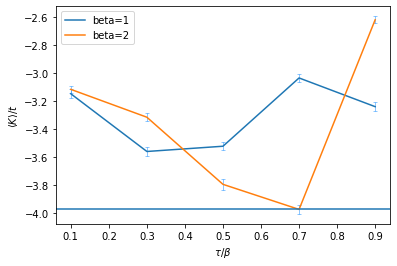

In [23]:
# Plot kinetic energy as function of tau slices
fig, ax1 = plt.subplots()

for i in beta_list:
    label = f'beta={i}'
    ax1.plot(tau_slices,K_mean[label],'-',label=label)
    ax1.errorbar(tau_slices,K_mean[label],marker='o',mec='dodgerblue',
                                mfc='lightskyblue',mew=0.5,alpha=1,
                                yerr=K_err[label],fmt='o',
                                ecolor='dodgerblue',zorder=1,capsize=2,
                                ms=0,elinewidth=0.5)
ax1.axhline(-3.5311-0.438)
ax1.set_ylabel(r'$\langle K \rangle /t$')
ax1.set_xlabel(r'$\tau/\beta$')
plt.legend()

In [16]:
print(len(K['beta=1']))
print(len(K['beta=2']))
print(len(K['beta=3']))

16002
7425


KeyError: 'beta=3'

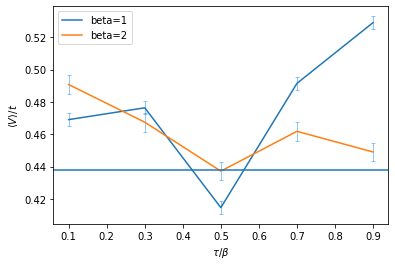

In [17]:
# Plot diagonal energy as function of tau slices
fig, ax2 = plt.subplots()

for i in beta_list:
    label = f'beta={i}'
    ax2.plot(tau_slices,V_mean[label],'-',label=label)
    ax2.errorbar(tau_slices,V_mean[label],marker='o',mec='dodgerblue',
                                mfc='lightskyblue',mew=0.5,alpha=1,
                                yerr=V_err[label],fmt='o',
                                ecolor='dodgerblue',zorder=1,capsize=2,
                                ms=0,elinewidth=0.5)
ax2.axhline(0.438)
ax2.set_ylabel(r'$\langle V \rangle /t$')
ax2.set_xlabel(r'$\tau/\beta$')
plt.legend()

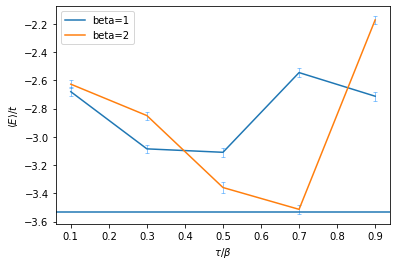

In [18]:
# Plot total ground state energy as function of tau slices
fig, ax3 = plt.subplots()

for i in beta_list:
    label = f'beta={i}'
    ax3.plot(tau_slices,E_mean[label],'-',label=label)
    ax3.errorbar(tau_slices,E_mean[label],marker='o',mec='dodgerblue',
                                mfc='lightskyblue',mew=0.5,alpha=1,
                                yerr=E_err[label],fmt='o',
                                ecolor='dodgerblue',zorder=1,capsize=2,
                                ms=0,elinewidth=0.5)
ax3.axhline(-3.531128874149274)
ax3.set_ylabel(r'$\langle E \rangle /t$')
ax3.set_xlabel(r'$\tau/\beta$')
plt.legend()

In [19]:
K

{'beta=1': array([[ -0., -15.,  -0.,  -5.,  -5.],
        [ -0., -15.,  -0.,  -5.,  -5.],
        [ -0., -10.,  -0.,  -5.,  -5.],
        ...,
        [ -5.,  -0.,  -5.,  -5.,  -5.],
        [ -5.,  -0.,  -5.,  -5.,  -5.],
        [ -5.,  -0.,  -5.,  -5.,  -5.]]),
 'beta=2': array([[-2.5, -2.5, -2.5, -0. , -2.5],
        [-2.5, -2.5, -2.5, -0. , -2.5],
        [-2.5, -2.5, -2.5, -0. , -2.5],
        ...,
        [-0. , -5. , -5. , -2.5, -2.5],
        [-0. , -5. , -5. , -2.5, -2.5],
        [-0. , -5. , -5. , -2.5, -2.5]])}

In [20]:
### Running averages

In [21]:
K_halfBeta = K['beta=1'][:,2]
K_halfBeta_cumsum = np.cumsum(K_halfBeta)
for i in range(len(K_halfBeta)):
    K_halfBeta_cumsum[i] /= (i+1)

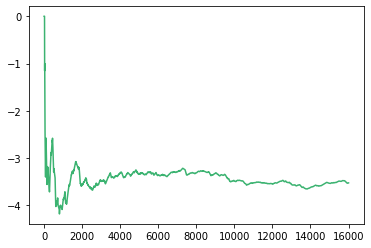

In [22]:
fig, ax4 = plt.subplots()
ax4.plot(K_halfBeta_cumsum,'-',color='mediumseagreen',label=r'$\beta=1.0$')

In [194]:
V_halfBeta = V['beta=2'][:,2]
V_halfBeta_cumsum = np.cumsum(V_halfBeta)
for i in range(len(V_halfBeta)):
    V_halfBeta_cumsum[i] /= (i+1)

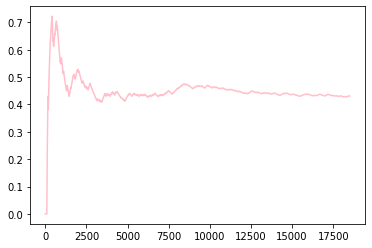

In [195]:
fig, ax5 = plt.subplots()
ax5.plot(V_halfBeta_cumsum,'-',color='pink',label=r'$\beta=1.0$')

In [196]:
E_halfBeta = E['beta=2'][:,2]
E_halfBeta_cumsum = np.cumsum(E_halfBeta)
for i in range(len(E_halfBeta)):
    E_halfBeta_cumsum[i] /= (i+1)

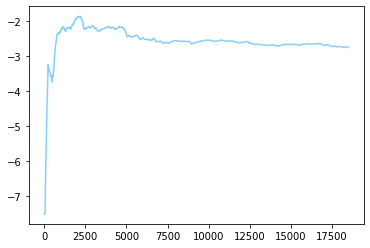

In [197]:
fig, ax5 = plt.subplots()
ax5.plot(E_halfBeta_cumsum,'-',color='lightskyblue',label=r'$\beta=1.0$')

In [332]:
len(V['beta=5'])

6287

In [331]:
len(V['beta=1'])

37765